# DMP Theory

In a DMP, the demonstrated motion with one degree of freedom (DoF) is modeled as a spring-damper system.

\begin{equation*}
    \tau^2 \ddot{x} = \alpha_x(\beta_x(g-x)-\tau\dot{x})+f
\end{equation*}

where $x$ is the state of the system, $f$ is the forcing function that determines the nonlinear behavior, $\alpha_x$ and $\beta_x$ are constants that determine the damping and spring behavior, respectively.$\tau$ is a constant that determines the temporal behavior, and $g$ denotes the goal state.

The time is modelled by a phase variable $z$ as follows:
\begin{equation*}
    \tau \dot z = -\alpha_z z
\end{equation*}
In this case, the phase variable $z$ is given by a function of time t
\begin{equation*}
    z(t) = z_0 exp(-\frac{\alpha_z}{\tau}t)
\end{equation*}
Typically, the phase variable  $z \in [0, 1]$.

Using a Gaussian basis function with this phase variable $z$, the forcing function $f$ can be formulated as
\begin{equation*}
    f(z) = (g-x_0)\sum_{i=1}^M\psi_i(z)w_iz
\end{equation*}
where $x_0$ denotes the initial position and $M$ the number of the basis
functions. The Gaussian basis function $\psi_i(z)$ is given by
\begin{equation*}
    \psi_i(z) = \frac{exp(-h_i(z-c_i)^2)}{\sum_{j=i}^Mexp(-h_j(z-c_j)^2)}
\end{equation*}
where $h_i$ and $c_i$ are constants that determine the width and centers of
the basis functions, respectively.

$\textbf{Important Note(hyperparameters):}$ While implementing the basis functions make sure that the centers of the gaussians are equally spaced in time (not in phase domain) and $h_i = M/c_i$ , $z_0=1$ , $\beta_x=\frac{\alpha_x}{4}$ , $\alpha_z = \frac{\alpha_x}{3}$ and $\alpha_x=25$.

To obtain the weight parameters in a DMP, we compute the target value of the forcing function from the given trajectory as

\begin{equation*}
    f_{target}(z(t)) = \tau^2\ddot{x}^{demo}(t)-\alpha_x(\beta_x(g-x^{demo}(t))-\tau\dot{x}^{demo}(t))
\end{equation*}

where $x^{demo}(t), \dot{x}^{demo}(t), \ddot{x}^{demo}(t)$ are the position, velocity and acceleration at the time $t$, respectively.

We can find the weight vector by minimizing the sum of the squared error.

\begin{equation*}
    L_{DMP} = \sum_{t=0}^T(f_{target}(z(t))-f(z(t)))^2
\end{equation*}

by solving the least squares solution we get

\begin{equation*}
    w = (\Phi^T\Phi)^{-1}\Phi^TF
\end{equation*}

where $\Phi_{i,j} = \psi_j(z(t_i))*z(t_i)$ and

\begin{equation*}
    F=[\frac{f_{target}(0)}{(g-x_0)},\cdots,\frac{f_{target}(t)}{(g-x_0)},\cdots,\frac{f_{target}(T)}{(g-x_0)}]
\end{equation*}

$\textbf{Important Note(dimensionality):}$ Since DMPs are primarily designed
for learning a motion for a single degree of freedom, multiple DMPs
need to be learned for each dimension when learning motions with multiple dimensions.

In [19]:
%reload_ext autoreload
%autoreload 2

from functools import partial

from utils.helpers import load_data, plot_curves, streamplot
from utils.models import BaseModelABC
from utils.utils import *

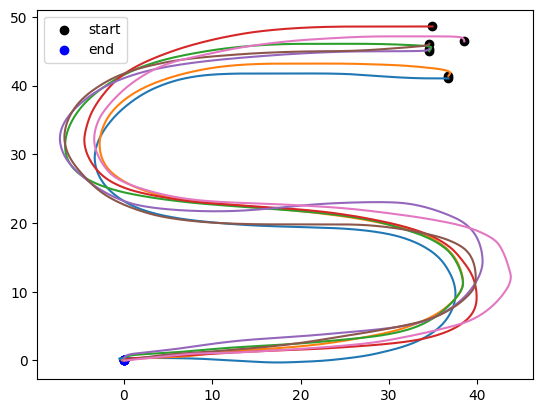

In [49]:
data = load_data("s")

# 1Q. Plot all the Trajectories (10 Marks)

In [50]:
# get a single trajectory from data
x = data[0]
x0, g = x[0], x[-1]

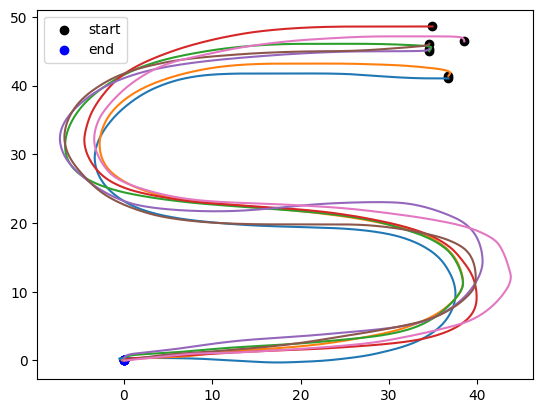

In [51]:
plot_curves(x)

# 2Q. DMP IMPLEMENTATION (50 Marks)
## please fill the code in the 'YOUR CODE HERE' section
## information about the hyperparameters and theory is given in the question paper

In [14]:
class DMP(BaseModelABC):
    def __init__(self, alpha: float, n_features):
        """
        set the hyperparameters
        """
        # set the hyperparameters from the inputs
        # self.alpha,self.beta,self.alpha_z,self.n_features
        # information about the values of the parameters is given in the theory part

        self.alpha = alpha
        self.beta = 0.5 * self.alpha
        self.alpha_z: float = alpha / 3.0
        self.n_features = n_features

    def derivative(self, x):
        """
        difference method for calculating derivative

        params:
            x: array of shape (number of trajectories,number of timesteps,2)

        returns
            xd: array of shape (number of trajectories,number of timesteps,2)
        """
        T, ndims = x.shape
        return np.vstack((np.zeros((1, ndims)), np.diff(x, axis=0) / self._dt))

    def get_features(self, z, cz, hz):
        """
        Returns the PSI matrix as given in the theory part

        input:
            z : array of shape (n_steps,)
            cz: centers of gaussian in phase domain ,array of shape(n_features,)
            hz: scaling factor for each of the gaussian ,array of shape (n_features,)
        returns:
            features: array of shape (n_steps,n_features)
        """

        features = np.exp(-hz * (z - cz) ** 2)
        features = features / np.sum(features, axis=1, keepdims=True)
        return features

    def fit(self, x):
        """
        learn the weight vector from LeastSquares,store the weight vectors in self.w (array of shape

        input
            x: trajectory data (n_steps,2)
        """

        # set x0 (starting point) , g(goal point) in self.x0,self.g respectively.
        # assumption is that g(goal point) is the end of the trajectory , and x0 is the start of the trajectory
        # self.x (array of shape (n_steps,2) , self.x0 (array of shape (2,)) , self.g (array of shape (2,))
        ################################
        # YOUR CODE HERE

        ################################

        self.T_train = 1.0
        self._dt = self.T_train / (x.shape[0] - 1)

        # get the speed and acceleration using self.derivative method and store it in self.xd,self.xdd
        # self.xd (array of shape (n_steps,2)),self.xdd (array of shape (n_steps,2))
        ################################
        # YOUR CODE HERE

        ################################

        # calulate f_target as mentioned in the theory part and store in "f_target" variable
        # f_target (array of shape (n_steps,2))
        ################################
        # YOUR CODE HERE

        ################################

        # set the centers,scaling for basis functions in self.cz,self.hz variables (Note that equal spacing in time domain ,not in phase domain)
        # information about self.hz  (scaling parameter) is given in the theory part
        # self.cz (array of shape (n_features,)),self.hz (array of shape(n_features,))
        ################################
        # YOUR CODE HERE

        ################################

        t = np.linspace(0, self.T_train, x.shape[0])
        z = np.exp(-self.alpha_z * t)
        # store the feature matrix in "feature" variable, use the get_features method.
        # features (array of shape (n_steps,n_features))
        ################################
        # YOUR CODE HERE

        ################################

        # get the weight vectors using leastsquares(can also use np.linalg.pinv) and store in self.w
        # self.w (array of shape (n_features,2))
        ################################
        # YOUR CODE HERE

        ################################

    def predict(self, X):
        """For backwards compatibility"""
        return super().predict(X)

    def f_external(self, z):
        """
        once we have the weight vector,get the control function.

        input:
            z: float (phase variable)
        output
            f_ext: array of shape (2,) (for both x1,x2)
        """
        cz = self.cz
        hz = self.hz
        # here cz is the centers of the gaussians, hz are the scaling factors
        # forcing function definition given in the theory part
        ################################
        # YOUR CODE HERE

        ################################

    def ode_differential(self, x, t, f_ext):
        """spring-mass dynamcis
        used for rk4 simulation later ,f_ext is function of z

        input :
            x : array of shape (5,) where 5 dimension where x is x1,x2,x1_dot,x2_dot,z
            t : float >=0.0 (dummy parameter , you will not be using this)
            f_ext : function that takes z as input and returns 2 dimensional array (control forces for x1,x2)
        output: array of shape (5,) where 5 dimension where x is x1_dot,x2_dot,x1_dot_dot,x2_dot_dot,z_dot
        """
        alpha, beta, alpha_z, tau = self.alpha, self.beta, self.alpha_z, self.tau
        # Use the above hyperparameters for dynamical system
        ################################
        # YOUR CODE HERE

        ################################

    def imitate(self, x0=None, g=None, tau=1.0):
        """
        after learning , we can change the starting position and the ending position for imitation,
        temporal variation is done by tau
        """
        if x0 is not None:
            self.x0 = x0
        if g is not None:
            self.g = g
        self.tau = tau

        # function to use for controller
        f_ext = self.f_external

        # dynamics function
        f_diff = partial(self.ode_differential, f_ext=f_ext)

        # inital point with zero velocity,zeros acceleration
        x_initial = np.array([self.x0[0], self.x0[1], 0.0, 0.0, 1.0])

        # rk4 simulation, till convergence
        x_rk4, t_rk4 = self.rk4_sim(0, x_initial, f_diff)

        # plotting
        plt.plot(x_rk4[:, 0], x_rk4[:, 1], label="dmp")
        plt.plot(self.x[:, 0], self.x[:, 1], label="original")
        plt.legend()
        plt.show()

    def rk4_sim(self, t0, x0, f, dt=1e-3, max_iter=1e5):
        """
        simlution done with rk4

        Returns
        -------
        x : shape (n_steps,5)
        t : shape - (n_steps,)
        """

        # Calculate slopes
        x, t = x0, t0
        x_list, t_list = [x0], [t0]
        i = 0
        while np.linalg.norm(x[:2] - self.g) > 5e-1:
            k1 = dt * f(x, t)
            k2 = dt * f(x + k1 / 2.0, t + dt / 2.0)
            k3 = dt * f(x + k2 / 2.0, t + dt / 2.0)
            k4 = dt * f(x + k3, t + dt)

            # Calculate new x and y
            x = x + 1.0 / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
            t = t + dt
            x_list.append(x)
            t_list.append(t)
            i += 1
            if i >= max_iter:
                print("MAX ITER REACHED : taking too long to converge")
                print(f"simulated for {t} seconds")
                return
        print(f"Took {t} seconds to reach the goal")

        return np.array(x_list), np.array(t_list)

In [15]:
# train the dmp model
alpha = 25
n_features = 10
dmp = DMP(alpha, n_features)
dmp.fit(x)

In [16]:
# imitation for training configuration
x0, g = x[0], x[-1]
tau = 1.0
dmp.imitate(x0, g, tau)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

# 3Q. SPATIAL VARIATION (15 Marks)

## Try 5 different configurations of starting and goal positions and plot the generated trajectories.Comment on the generalization and stability.

In [ ]:
################################
#YOUR CODE HERE

################################

# 4Q. TEMPORAL VARIATION (15 Marks)

## from the training configuration($\textbf{x0}=x[0],\textbf{g}=x[-1]$), try $5$ different $\tau \gt 0$ (temporal parameter in the algorithm), some greater than 1 and some less than 1.Note down the approximate time taken for the generated trajectories to converge. Comment on the effect of temporal parameter.


In [ ]:
################################
#YOUR CODE HERE

################################


# 5Q.
Discuss and compare the following methods in the context of dynamic movement primitives (DMPs): DMP, SEDS, ProMP, TP-GMM, and TP-GPT. In your answer, analyze how each method addresses two key aspects:

Stability: How does the method ensure convergence or robustness in generating movements?

Generalization: How effectively does the method adapt to variations or new conditions beyond the training demonstrations?

Present your analysis in a table format with the rows representing each method (DMP, SEDS, ProMP, TP-GMM, TP-GPT) and the columns for Stability and Generalization. Be sure to critically evaluate the strengths and weaknesses of each approach in these dimensions.. (10 Marks)